<a href="https://colab.research.google.com/github/Kajalnsingh/Loan_Approval_Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Loan Approval Dataset from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d taweilo/loan-approval-classification-data -p /content --unzip

Dataset URL: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data
License(s): apache-2.0


In [ ]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pandas as pd
df = pd.read_csv('/content/loan_data.csv')

Data Overview


The dataset contains 45,000 records and 14 variables, each described below:

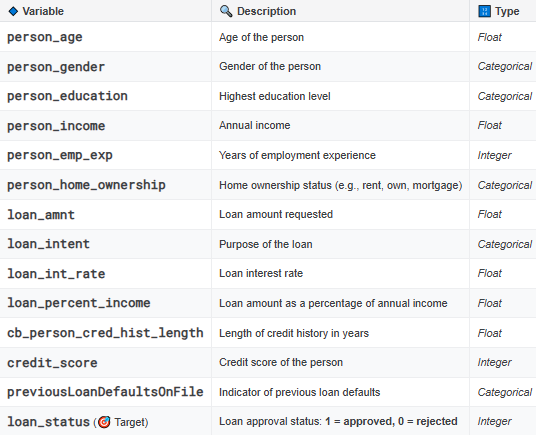

In [ ]:
#First 5 rows of data
df.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df['loan']= df['loan_status'].replace({0:'Applied',
                                       1:'Approved'})
df.head(1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,Approved


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
#converted age from float ti ubt values
df['person_age'] = df['person_age'].astype('int')

In [ ]:
# checking null values
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


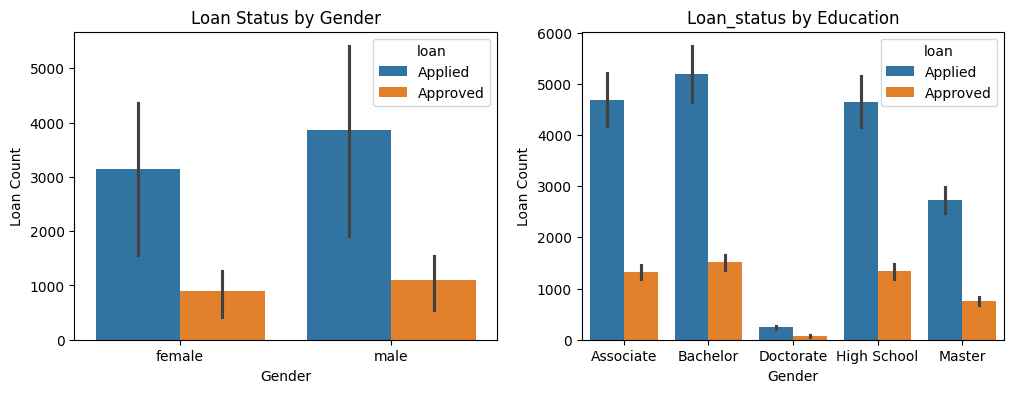

In [ ]:
# Group by person_gender and loan_status, then count the occurrences
grouped_gender = df.groupby(['person_gender','person_education', 'loan']).size().reset_index(name='loan_count')

fig , axes = plt.subplots(1, 2, figsize = (12,4))
sns.barplot(data=grouped_gender, x='person_gender', y='loan_count', hue='loan', ax = axes[0])
axes[0].set_title('Loan Status by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Loan Count')

sns.barplot(data=grouped_gender, x='person_education', y='loan_count', hue = 'loan', ax = axes[1])
axes[1].set_title('Loan_status by Education')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Loan Count')
plt.show()

In [ ]:
# separated my data into 2 parts, numerical and categorical
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']
number_col = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
print(cat_col)
print(number_col)

['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan']
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


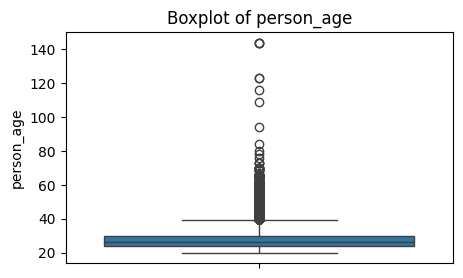

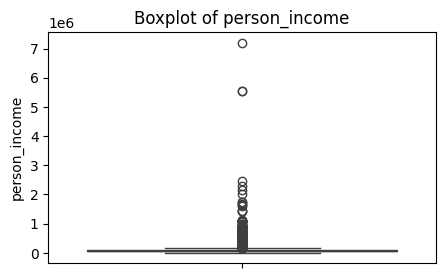

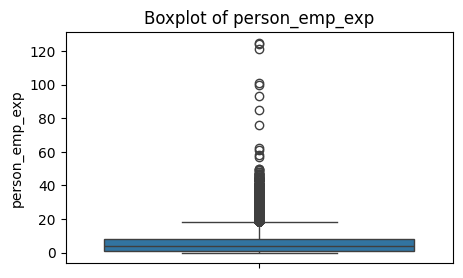

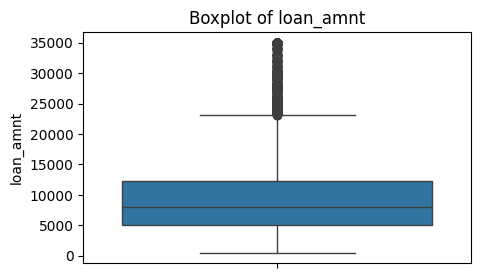

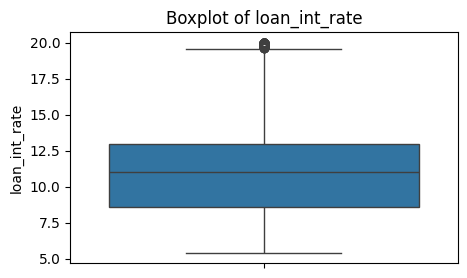

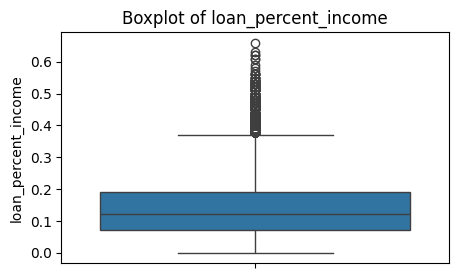

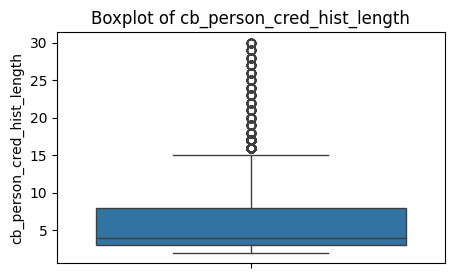

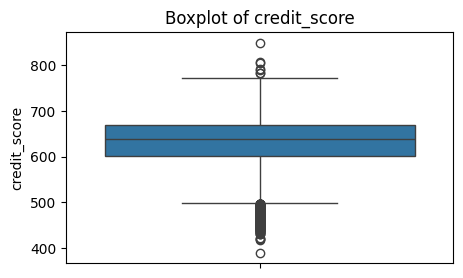

In [ ]:
for col in number_col:
  plt.figure(figsize = (5,3))
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [ ]:
# handle outliers in numeric columns
for col in number_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  median_value = df[col].median()
  df.loc[df[col]>(Q3 + 1.5 * IQR), col] = median_value

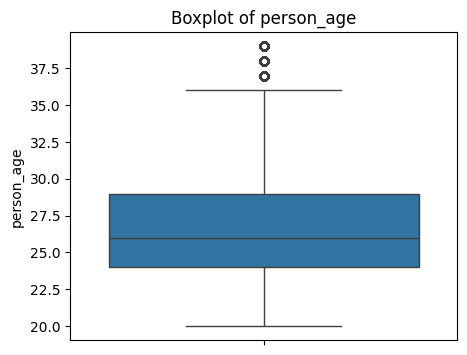

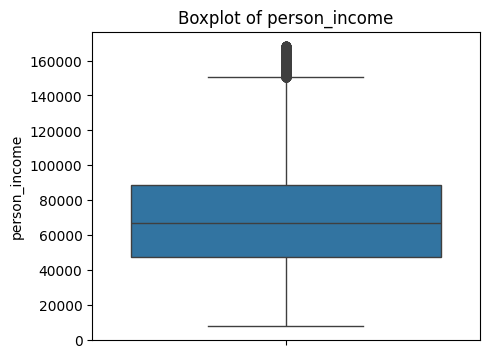

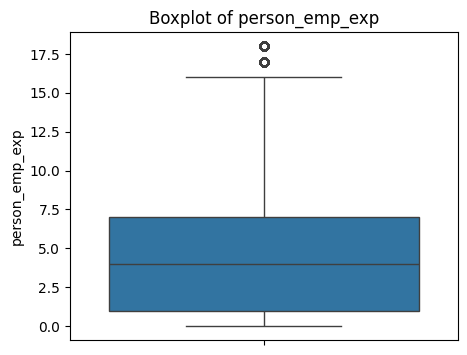

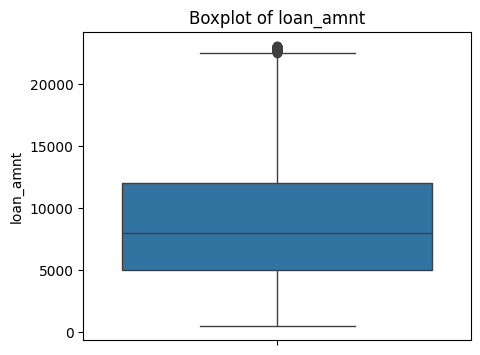

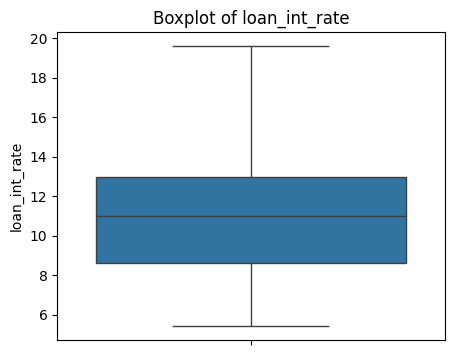

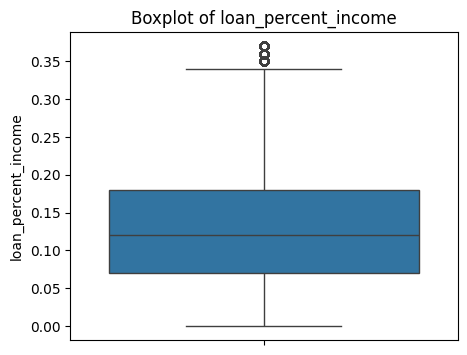

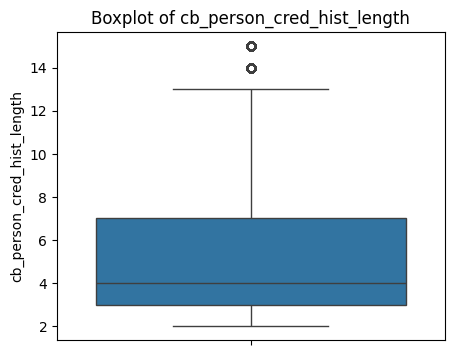

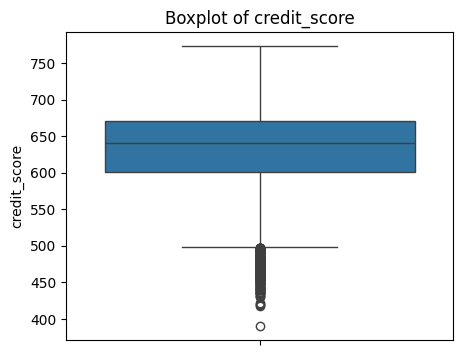

In [ ]:
for col in number_col:
  plt.figure(figsize = (5,4))
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

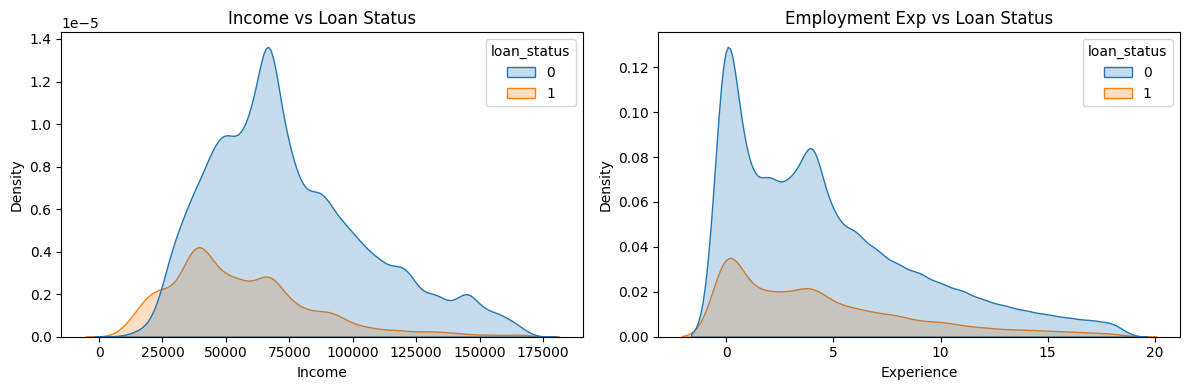

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# First KDE plot: income
sns.kdeplot(data=df, x='person_income', hue='loan_status', fill=True, ax=axes[0])
axes[0].set_title("Income vs Loan Status")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Density")

# Second KDE plot: employment experience
sns.kdeplot(data=df, x='person_emp_exp', hue='loan_status', fill=True, ax=axes[1])
axes[1].set_title("Employment Exp vs Loan Status")
axes[1].set_xlabel("Experience")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


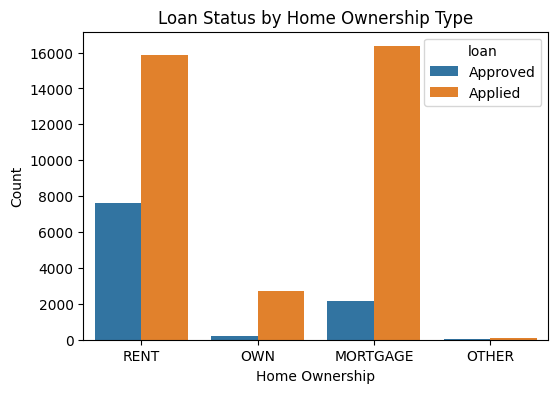

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(data=df, x='person_home_ownership', hue='loan')
plt.title('Loan Status by Home Ownership Type')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

In [ ]:
df.head(1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan
0,22,female,Master,71948.0,0,RENT,8000.0,PERSONAL,16.02,0.12,3.0,561,No,1,Approved


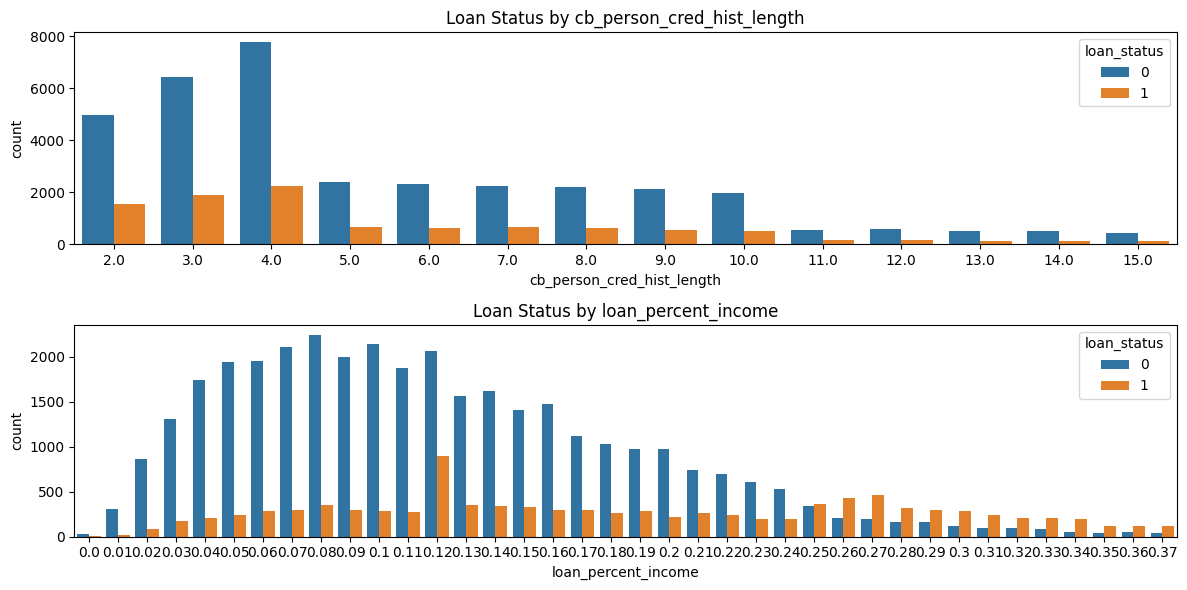

In [ ]:
loan_info = ['cb_person_cred_hist_length','loan_percent_income']
fig , axes = plt.subplots(2, 1, figsize = (12,6))
for i,col in enumerate(loan_info):
  sns.countplot(data = df, x = col, hue = 'loan_status', ax = axes[i])
  axes[i].set_title(f"Loan Status by {col}")

plt.tight_layout()
plt.show()

<Axes: xlabel='credit_score', ylabel='Count'>

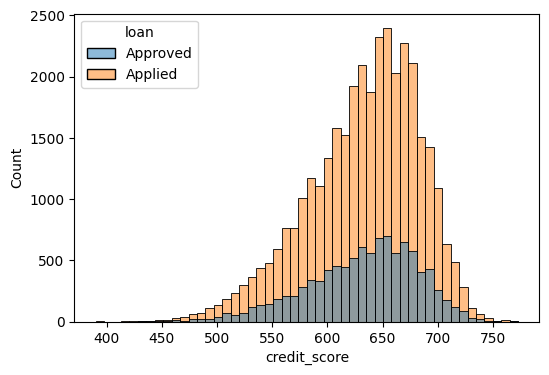

In [ ]:
plt.figure(figsize = (6,4))
sns.histplot(data = df, x ='credit_score' ,hue ='loan' ,bins = 50)

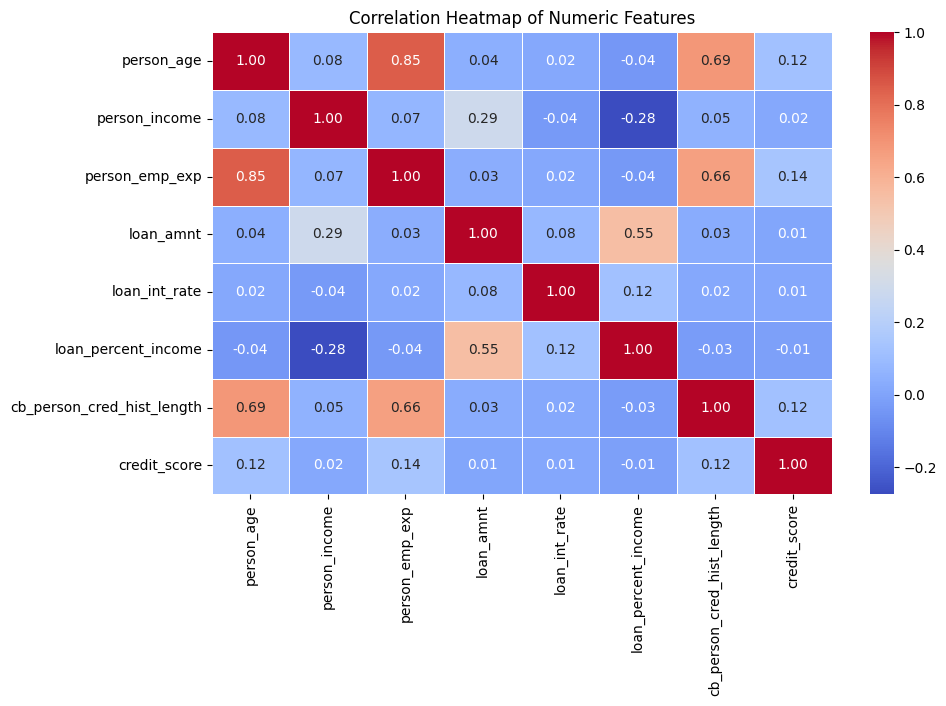

In [ ]:
numeric_df = df[number_col]
# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


#Machine Learning Algorithm

#Logistic Regression

In [ ]:
x = numeric_df
y = df['loan_status']

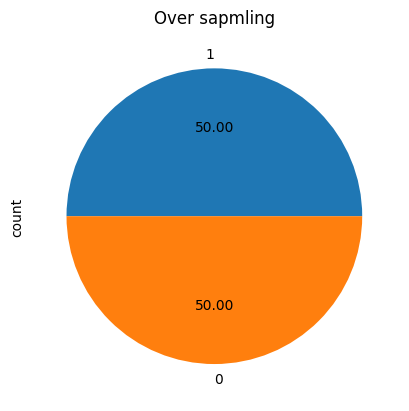

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)
ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Over sapmling")

In [ ]:
x_train, x_test, y_train , y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape , y_test.shape

# 2. Fit scaler only on training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# 3. Transform test data using the same scaler
x_test_scaled = scaler.transform(x_test)


In [ ]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
y_train.shape

(56000, 1)

In [ ]:
LogReg = LogisticRegression(max_iter = 10000)

LogReg.fit(x_train_scaled,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [ ]:
y_pred = LogReg.predict(x_test_scaled)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7514285714285714
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      7023
           1       0.74      0.77      0.75      6977

    accuracy                           0.75     14000
   macro avg       0.75      0.75      0.75     14000
weighted avg       0.75      0.75      0.75     14000



In [ ]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[5177, 1846],
       [1634, 5343]])

#Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators = 200, random_state = 42, n_jobs = 1)
RF.fit(x_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=42)

In [ ]:
y_pred_RF = RF.predict(x_test_scaled)

In [ ]:
print(accuracy_score(y_test, y_pred_RF))
print("\nClassification Report\n", classification_report(y_test, y_pred_RF))

0.9007142857142857

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      7023
           1       0.90      0.90      0.90      6977

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



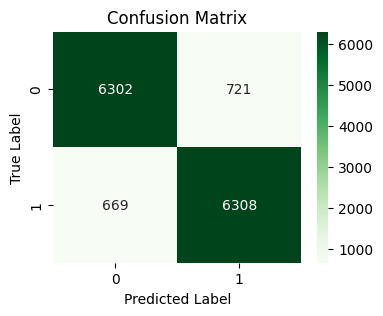

In [ ]:
con_mat = confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(4, 3))  # Better aspect ratio
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#XGBoost Classifier Algorithm

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred_xg = model.predict(x_test)


In [ ]:
print(accuracy_score(y_test, y_pred_xg))
print("\nClassification Report\n", classification_report(y_test, y_pred_xg))

0.894

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      7023
           1       0.91      0.88      0.89      6977

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



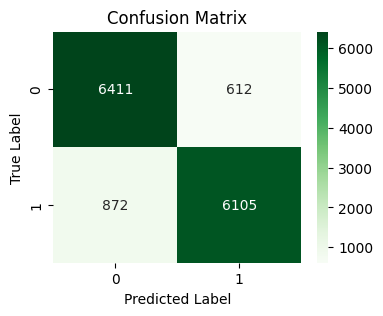

In [ ]:
con_mat = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(4, 3))  # Better aspect ratio
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()